##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 20:27 - loss: 0.1756

  42/1875 [..............................] - ETA: 2s - loss: 0.1062   

  86/1875 [>.............................] - ETA: 2s - loss: 0.0834

 131/1875 [=>............................] - ETA: 2s - loss: 0.0719

 174/1875 [=>............................] - ETA: 1s - loss: 0.0646

 218/1875 [==>...........................] - ETA: 1s - loss: 0.0594

 261/1875 [===>..........................] - ETA: 1s - loss: 0.0553

 305/1875 [===>..........................] - ETA: 1s - loss: 0.0520

 349/1875 [====>.........................] - ETA: 1s - loss: 0.0492

 394/1875 [=====>........................] - ETA: 1s - loss: 0.0468

 438/1875 [======>.......................] - ETA: 1s - loss: 0.0447

 483/1875 [======>.......................] - ETA: 1s - loss: 0.0429

 527/1875 [=======>......................] - ETA: 1s - loss: 0.0414

 572/1875 [========>.....................] - ETA: 1s - loss: 0.0400

 615/1875 [========>.....................] - ETA: 1s - loss: 0.0388

 659/1875 [=========>....................] - ETA: 1s - loss: 0.0377

 702/1875 [==========>...................] - ETA: 1s - loss: 0.0366

 746/1875 [==========>...................] - ETA: 1s - loss: 0.0357

 790/1875 [===========>..................] - ETA: 1s - loss: 0.0348

 835/1875 [============>.................] - ETA: 1s - loss: 0.0340

 879/1875 [=============>................] - ETA: 1s - loss: 0.0332

 922/1875 [=============>................] - ETA: 1s - loss: 0.0326

 964/1875 [==============>...............] - ETA: 1s - loss: 0.0319

1007/1875 [===============>..............] - ETA: 1s - loss: 0.0313

1050/1875 [===============>..............] - ETA: 0s - loss: 0.0308

1094/1875 [================>.............] - ETA: 0s - loss: 0.0302

1136/1875 [=================>............] - ETA: 0s - loss: 0.0297

1178/1875 [=================>............] - ETA: 0s - loss: 0.0292

1220/1875 [==================>...........] - ETA: 0s - loss: 0.0287

1263/1875 [===================>..........] - ETA: 0s - loss: 0.0283

1307/1875 [===================>..........] - ETA: 0s - loss: 0.0279

1351/1875 [====================>.........] - ETA: 0s - loss: 0.0274

1393/1875 [=====================>........] - ETA: 0s - loss: 0.0271

1435/1875 [=====================>........] - ETA: 0s - loss: 0.0267

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0264

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0260

1562/1875 [=======================>......] - ETA: 0s - loss: 0.0257

1603/1875 [========================>.....] - ETA: 0s - loss: 0.0254

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0251

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0249

1723/1875 [==========================>...] - ETA: 0s - loss: 0.0246

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0244

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0241

1846/1875 [============================>.] - ETA: 0s - loss: 0.0239

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0237 - val_loss: 0.0131


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0148

  44/1875 [..............................] - ETA: 2s - loss: 0.0132

  88/1875 [>.............................] - ETA: 2s - loss: 0.0130

 132/1875 [=>............................] - ETA: 2s - loss: 0.0130

 176/1875 [=>............................] - ETA: 1s - loss: 0.0129

 220/1875 [==>...........................] - ETA: 1s - loss: 0.0129

 264/1875 [===>..........................] - ETA: 1s - loss: 0.0128

 306/1875 [===>..........................] - ETA: 1s - loss: 0.0128

 350/1875 [====>.........................] - ETA: 1s - loss: 0.0127

 395/1875 [=====>........................] - ETA: 1s - loss: 0.0127

 438/1875 [======>.......................] - ETA: 1s - loss: 0.0127

 481/1875 [======>.......................] - ETA: 1s - loss: 0.0126

 525/1875 [=======>......................] - ETA: 1s - loss: 0.0125

 570/1875 [========>.....................] - ETA: 1s - loss: 0.0125

 614/1875 [========>.....................] - ETA: 1s - loss: 0.0124

 659/1875 [=========>....................] - ETA: 1s - loss: 0.0124

 703/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0124

 791/1875 [===========>..................] - ETA: 1s - loss: 0.0123

 835/1875 [============>.................] - ETA: 1s - loss: 0.0123

 880/1875 [=============>................] - ETA: 1s - loss: 0.0123

 924/1875 [=============>................] - ETA: 1s - loss: 0.0122

 968/1875 [==============>...............] - ETA: 1s - loss: 0.0122

1012/1875 [===============>..............] - ETA: 0s - loss: 0.0121

1056/1875 [===============>..............] - ETA: 0s - loss: 0.0121

1098/1875 [================>.............] - ETA: 0s - loss: 0.0121

1143/1875 [=================>............] - ETA: 0s - loss: 0.0120

1187/1875 [=================>............] - ETA: 0s - loss: 0.0120

1231/1875 [==================>...........] - ETA: 0s - loss: 0.0120

1276/1875 [===================>..........] - ETA: 0s - loss: 0.0119

1320/1875 [====================>.........] - ETA: 0s - loss: 0.0119

1362/1875 [====================>.........] - ETA: 0s - loss: 0.0118

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0118

1449/1875 [======================>.......] - ETA: 0s - loss: 0.0118

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0118

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0117

1581/1875 [========================>.....] - ETA: 0s - loss: 0.0117

1624/1875 [========================>.....] - ETA: 0s - loss: 0.0117

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0117

1707/1875 [==========================>...] - ETA: 0s - loss: 0.0116

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0116

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0116

1838/1875 [============================>.] - ETA: 0s - loss: 0.0116

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0115 - val_loss: 0.0105


Epoch 3/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0115

  45/1875 [..............................] - ETA: 2s - loss: 0.0105

  89/1875 [>.............................] - ETA: 2s - loss: 0.0104

 133/1875 [=>............................] - ETA: 2s - loss: 0.0104

 178/1875 [=>............................] - ETA: 1s - loss: 0.0104

 223/1875 [==>...........................] - ETA: 1s - loss: 0.0104

 268/1875 [===>..........................] - ETA: 1s - loss: 0.0104

 312/1875 [===>..........................] - ETA: 1s - loss: 0.0104

 357/1875 [====>.........................] - ETA: 1s - loss: 0.0104

 400/1875 [=====>........................] - ETA: 1s - loss: 0.0104

 443/1875 [======>.......................] - ETA: 1s - loss: 0.0103

 487/1875 [======>.......................] - ETA: 1s - loss: 0.0103

 531/1875 [=======>......................] - ETA: 1s - loss: 0.0103

 576/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 620/1875 [========>.....................] - ETA: 1s - loss: 0.0103

 664/1875 [=========>....................] - ETA: 1s - loss: 0.0103

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0103

 752/1875 [===========>..................] - ETA: 1s - loss: 0.0103

 794/1875 [===========>..................] - ETA: 1s - loss: 0.0102

 837/1875 [============>.................] - ETA: 1s - loss: 0.0103

 879/1875 [=============>................] - ETA: 1s - loss: 0.0102

 922/1875 [=============>................] - ETA: 1s - loss: 0.0102

 965/1875 [==============>...............] - ETA: 1s - loss: 0.0102

1008/1875 [===============>..............] - ETA: 1s - loss: 0.0102

1052/1875 [===============>..............] - ETA: 0s - loss: 0.0102

1096/1875 [================>.............] - ETA: 0s - loss: 0.0102

1140/1875 [=================>............] - ETA: 0s - loss: 0.0102

1184/1875 [=================>............] - ETA: 0s - loss: 0.0101

1227/1875 [==================>...........] - ETA: 0s - loss: 0.0101

1270/1875 [===================>..........] - ETA: 0s - loss: 0.0101

1313/1875 [====================>.........] - ETA: 0s - loss: 0.0101

1356/1875 [====================>.........] - ETA: 0s - loss: 0.0101

1400/1875 [=====================>........] - ETA: 0s - loss: 0.0101

1443/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1486/1875 [======================>.......] - ETA: 0s - loss: 0.0101

1529/1875 [=======================>......] - ETA: 0s - loss: 0.0101

1573/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1616/1875 [========================>.....] - ETA: 0s - loss: 0.0101

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0101

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1746/1875 [==========================>...] - ETA: 0s - loss: 0.0100

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0100

1832/1875 [============================>.] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - ETA: 0s - loss: 0.0100

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0097


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0096

  45/1875 [..............................] - ETA: 2s - loss: 0.0093

  88/1875 [>.............................] - ETA: 2s - loss: 0.0094

 131/1875 [=>............................] - ETA: 2s - loss: 0.0094

 173/1875 [=>............................] - ETA: 2s - loss: 0.0095

 217/1875 [==>...........................] - ETA: 1s - loss: 0.0095

 260/1875 [===>..........................] - ETA: 1s - loss: 0.0095

 304/1875 [===>..........................] - ETA: 1s - loss: 0.0096

 347/1875 [====>.........................] - ETA: 1s - loss: 0.0096

 391/1875 [=====>........................] - ETA: 1s - loss: 0.0096

 434/1875 [=====>........................] - ETA: 1s - loss: 0.0096

 478/1875 [======>.......................] - ETA: 1s - loss: 0.0096

 521/1875 [=======>......................] - ETA: 1s - loss: 0.0095

 564/1875 [========>.....................] - ETA: 1s - loss: 0.0095

 607/1875 [========>.....................] - ETA: 1s - loss: 0.0095

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0095

 694/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 738/1875 [==========>...................] - ETA: 1s - loss: 0.0095

 782/1875 [===========>..................] - ETA: 1s - loss: 0.0095

 825/1875 [============>.................] - ETA: 1s - loss: 0.0095

 868/1875 [============>.................] - ETA: 1s - loss: 0.0095

 911/1875 [=============>................] - ETA: 1s - loss: 0.0095

 955/1875 [==============>...............] - ETA: 1s - loss: 0.0095

 999/1875 [==============>...............] - ETA: 1s - loss: 0.0095

1042/1875 [===============>..............] - ETA: 0s - loss: 0.0095

1085/1875 [================>.............] - ETA: 0s - loss: 0.0095

1129/1875 [=================>............] - ETA: 0s - loss: 0.0095

1172/1875 [=================>............] - ETA: 0s - loss: 0.0095

1215/1875 [==================>...........] - ETA: 0s - loss: 0.0095

1259/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1303/1875 [===================>..........] - ETA: 0s - loss: 0.0095

1347/1875 [====================>.........] - ETA: 0s - loss: 0.0095

1391/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1435/1875 [=====================>........] - ETA: 0s - loss: 0.0095

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1656/1875 [=========================>....] - ETA: 0s - loss: 0.0094

1701/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0094

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0094

1833/1875 [============================>.] - ETA: 0s - loss: 0.0094

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0095


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0110

  44/1875 [..............................] - ETA: 2s - loss: 0.0092

  88/1875 [>.............................] - ETA: 2s - loss: 0.0093

 132/1875 [=>............................] - ETA: 2s - loss: 0.0092

 177/1875 [=>............................] - ETA: 1s - loss: 0.0093

 222/1875 [==>...........................] - ETA: 1s - loss: 0.0092

 267/1875 [===>..........................] - ETA: 1s - loss: 0.0092

 311/1875 [===>..........................] - ETA: 1s - loss: 0.0093

 355/1875 [====>.........................] - ETA: 1s - loss: 0.0093

 399/1875 [=====>........................] - ETA: 1s - loss: 0.0093

 444/1875 [======>.......................] - ETA: 1s - loss: 0.0093

 488/1875 [======>.......................] - ETA: 1s - loss: 0.0093

 532/1875 [=======>......................] - ETA: 1s - loss: 0.0093

 576/1875 [========>.....................] - ETA: 1s - loss: 0.0093

 621/1875 [========>.....................] - ETA: 1s - loss: 0.0093

 665/1875 [=========>....................] - ETA: 1s - loss: 0.0093

 709/1875 [==========>...................] - ETA: 1s - loss: 0.0093

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0093

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0092

 841/1875 [============>.................] - ETA: 1s - loss: 0.0092

 885/1875 [=============>................] - ETA: 1s - loss: 0.0092

 929/1875 [=============>................] - ETA: 1s - loss: 0.0092

 973/1875 [==============>...............] - ETA: 1s - loss: 0.0092

1017/1875 [===============>..............] - ETA: 0s - loss: 0.0092

1061/1875 [===============>..............] - ETA: 0s - loss: 0.0092

1106/1875 [================>.............] - ETA: 0s - loss: 0.0092

1150/1875 [=================>............] - ETA: 0s - loss: 0.0092

1194/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1238/1875 [==================>...........] - ETA: 0s - loss: 0.0092

1282/1875 [===================>..........] - ETA: 0s - loss: 0.0092

1326/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1371/1875 [====================>.........] - ETA: 0s - loss: 0.0092

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0092

1459/1875 [======================>.......] - ETA: 0s - loss: 0.0092

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0092

1593/1875 [========================>.....] - ETA: 0s - loss: 0.0092

1637/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0092

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0092

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0092

1814/1875 [============================>.] - ETA: 0s - loss: 0.0092

1858/1875 [============================>.] - ETA: 0s - loss: 0.0092

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - val_loss: 0.0091


Epoch 6/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0103

  45/1875 [..............................] - ETA: 2s - loss: 0.0090

  90/1875 [>.............................] - ETA: 2s - loss: 0.0089

 134/1875 [=>............................] - ETA: 1s - loss: 0.0089

 179/1875 [=>............................] - ETA: 1s - loss: 0.0090

 224/1875 [==>...........................] - ETA: 1s - loss: 0.0090

 269/1875 [===>..........................] - ETA: 1s - loss: 0.0090

 314/1875 [====>.........................] - ETA: 1s - loss: 0.0090

 358/1875 [====>.........................] - ETA: 1s - loss: 0.0090

 401/1875 [=====>........................] - ETA: 1s - loss: 0.0090

 445/1875 [======>.......................] - ETA: 1s - loss: 0.0090

 490/1875 [======>.......................] - ETA: 1s - loss: 0.0090

 535/1875 [=======>......................] - ETA: 1s - loss: 0.0090

 579/1875 [========>.....................] - ETA: 1s - loss: 0.0090

 624/1875 [========>.....................] - ETA: 1s - loss: 0.0090

 665/1875 [=========>....................] - ETA: 1s - loss: 0.0090

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0090

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 797/1875 [===========>..................] - ETA: 1s - loss: 0.0090

 842/1875 [============>.................] - ETA: 1s - loss: 0.0090

 886/1875 [=============>................] - ETA: 1s - loss: 0.0090

 931/1875 [=============>................] - ETA: 1s - loss: 0.0090

 974/1875 [==============>...............] - ETA: 1s - loss: 0.0090

1018/1875 [===============>..............] - ETA: 0s - loss: 0.0090

1062/1875 [===============>..............] - ETA: 0s - loss: 0.0090

1106/1875 [================>.............] - ETA: 0s - loss: 0.0090

1150/1875 [=================>............] - ETA: 0s - loss: 0.0090

1194/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1239/1875 [==================>...........] - ETA: 0s - loss: 0.0090

1283/1875 [===================>..........] - ETA: 0s - loss: 0.0090

1328/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1373/1875 [====================>.........] - ETA: 0s - loss: 0.0090

1418/1875 [=====================>........] - ETA: 0s - loss: 0.0090

1462/1875 [======================>.......] - ETA: 0s - loss: 0.0090

1506/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1550/1875 [=======================>......] - ETA: 0s - loss: 0.0090

1595/1875 [========================>.....] - ETA: 0s - loss: 0.0090

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0090

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0090

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0090

1843/1875 [============================>.] - ETA: 0s - loss: 0.0090

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0091


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0102

  45/1875 [..............................] - ETA: 2s - loss: 0.0088

  90/1875 [>.............................] - ETA: 2s - loss: 0.0089

 135/1875 [=>............................] - ETA: 1s - loss: 0.0088

 180/1875 [=>............................] - ETA: 1s - loss: 0.0089

 222/1875 [==>...........................] - ETA: 1s - loss: 0.0089

 265/1875 [===>..........................] - ETA: 1s - loss: 0.0089

 310/1875 [===>..........................] - ETA: 1s - loss: 0.0089

 354/1875 [====>.........................] - ETA: 1s - loss: 0.0089

 398/1875 [=====>........................] - ETA: 1s - loss: 0.0089

 442/1875 [======>.......................] - ETA: 1s - loss: 0.0089

 487/1875 [======>.......................] - ETA: 1s - loss: 0.0089

 532/1875 [=======>......................] - ETA: 1s - loss: 0.0089

 576/1875 [========>.....................] - ETA: 1s - loss: 0.0089

 620/1875 [========>.....................] - ETA: 1s - loss: 0.0089

 663/1875 [=========>....................] - ETA: 1s - loss: 0.0089

 706/1875 [==========>...................] - ETA: 1s - loss: 0.0089

 750/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 794/1875 [===========>..................] - ETA: 1s - loss: 0.0089

 838/1875 [============>.................] - ETA: 1s - loss: 0.0089

 882/1875 [=============>................] - ETA: 1s - loss: 0.0089

 926/1875 [=============>................] - ETA: 1s - loss: 0.0089

 969/1875 [==============>...............] - ETA: 1s - loss: 0.0089

1014/1875 [===============>..............] - ETA: 0s - loss: 0.0089

1058/1875 [===============>..............] - ETA: 0s - loss: 0.0089

1101/1875 [================>.............] - ETA: 0s - loss: 0.0089

1144/1875 [=================>............] - ETA: 0s - loss: 0.0089

1189/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1234/1875 [==================>...........] - ETA: 0s - loss: 0.0089

1278/1875 [===================>..........] - ETA: 0s - loss: 0.0089

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1364/1875 [====================>.........] - ETA: 0s - loss: 0.0089

1408/1875 [=====================>........] - ETA: 0s - loss: 0.0089

1452/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0089

1542/1875 [=======================>......] - ETA: 0s - loss: 0.0089

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0089

1630/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1675/1875 [=========================>....] - ETA: 0s - loss: 0.0089

1719/1875 [==========================>...] - ETA: 0s - loss: 0.0089

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0089

1853/1875 [============================>.] - ETA: 0s - loss: 0.0089

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0090


Epoch 8/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0075

  46/1875 [..............................] - ETA: 2s - loss: 0.0088

  91/1875 [>.............................] - ETA: 2s - loss: 0.0086

 135/1875 [=>............................] - ETA: 1s - loss: 0.0087

 179/1875 [=>............................] - ETA: 1s - loss: 0.0087

 223/1875 [==>...........................] - ETA: 1s - loss: 0.0088

 268/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 313/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 357/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 402/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 447/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 492/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 537/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 582/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 627/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 760/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 804/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 846/1875 [============>.................] - ETA: 1s - loss: 0.0088

 891/1875 [=============>................] - ETA: 1s - loss: 0.0088

 936/1875 [=============>................] - ETA: 1s - loss: 0.0088

 981/1875 [==============>...............] - ETA: 1s - loss: 0.0088

1025/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1070/1875 [================>.............] - ETA: 0s - loss: 0.0088

1114/1875 [================>.............] - ETA: 0s - loss: 0.0088

1159/1875 [=================>............] - ETA: 0s - loss: 0.0088

1204/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1249/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1294/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1339/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1429/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1474/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1518/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1563/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1607/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1696/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1739/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1826/1875 [============================>.] - ETA: 0s - loss: 0.0088

1868/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0103

  45/1875 [..............................] - ETA: 2s - loss: 0.0088

  87/1875 [>.............................] - ETA: 2s - loss: 0.0088

 131/1875 [=>............................] - ETA: 2s - loss: 0.0088

 175/1875 [=>............................] - ETA: 1s - loss: 0.0088

 219/1875 [==>...........................] - ETA: 1s - loss: 0.0088

 264/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 309/1875 [===>..........................] - ETA: 1s - loss: 0.0088

 353/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 398/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 443/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 487/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 531/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 575/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 619/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 664/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 709/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 797/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 839/1875 [============>.................] - ETA: 1s - loss: 0.0088

 883/1875 [=============>................] - ETA: 1s - loss: 0.0088

 927/1875 [=============>................] - ETA: 1s - loss: 0.0088

 972/1875 [==============>...............] - ETA: 1s - loss: 0.0088

1016/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1060/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1104/1875 [================>.............] - ETA: 0s - loss: 0.0088

1146/1875 [=================>............] - ETA: 0s - loss: 0.0088

1189/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1233/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1277/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1320/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1364/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0088

1452/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0088

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0088

1581/1875 [========================>.....] - ETA: 0s - loss: 0.0088

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0088

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0088

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0088

1848/1875 [============================>.] - ETA: 0s - loss: 0.0088

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0081

  46/1875 [..............................] - ETA: 2s - loss: 0.0085

  90/1875 [>.............................] - ETA: 2s - loss: 0.0086

 135/1875 [=>............................] - ETA: 1s - loss: 0.0087

 180/1875 [=>............................] - ETA: 1s - loss: 0.0088

 225/1875 [==>...........................] - ETA: 1s - loss: 0.0087

 269/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 312/1875 [===>..........................] - ETA: 1s - loss: 0.0087

 357/1875 [====>.........................] - ETA: 1s - loss: 0.0088

 402/1875 [=====>........................] - ETA: 1s - loss: 0.0088

 447/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 492/1875 [======>.......................] - ETA: 1s - loss: 0.0088

 536/1875 [=======>......................] - ETA: 1s - loss: 0.0088

 581/1875 [========>.....................] - ETA: 1s - loss: 0.0088

 626/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 671/1875 [=========>....................] - ETA: 1s - loss: 0.0088

 715/1875 [==========>...................] - ETA: 1s - loss: 0.0088

 759/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0088

 846/1875 [============>.................] - ETA: 1s - loss: 0.0088

 889/1875 [=============>................] - ETA: 1s - loss: 0.0088

 934/1875 [=============>................] - ETA: 1s - loss: 0.0088

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0088

1019/1875 [===============>..............] - ETA: 0s - loss: 0.0088

1063/1875 [================>.............] - ETA: 0s - loss: 0.0088

1107/1875 [================>.............] - ETA: 0s - loss: 0.0088

1150/1875 [=================>............] - ETA: 0s - loss: 0.0088

1194/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1238/1875 [==================>...........] - ETA: 0s - loss: 0.0088

1282/1875 [===================>..........] - ETA: 0s - loss: 0.0088

1327/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1371/1875 [====================>.........] - ETA: 0s - loss: 0.0088

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0087

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0087

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1549/1875 [=======================>......] - ETA: 0s - loss: 0.0087

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0087

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0087

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0087

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0087

1815/1875 [============================>.] - ETA: 0s - loss: 0.0087

1860/1875 [============================>.] - ETA: 0s - loss: 0.0087

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0088


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

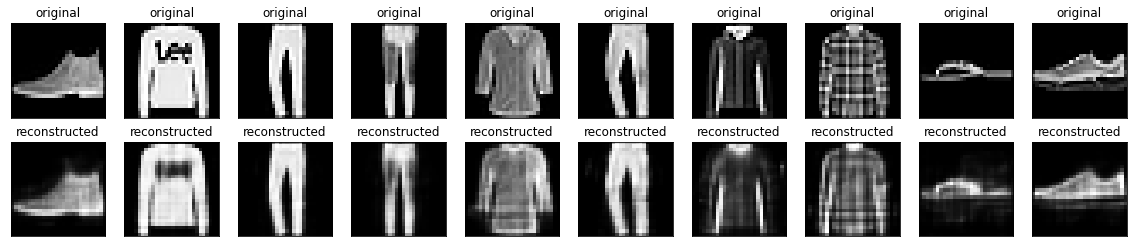

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Second example: Image denoising


![Image denoising results](images/image_denoise_fmnist_results.png)

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Adding random noise to the images

In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


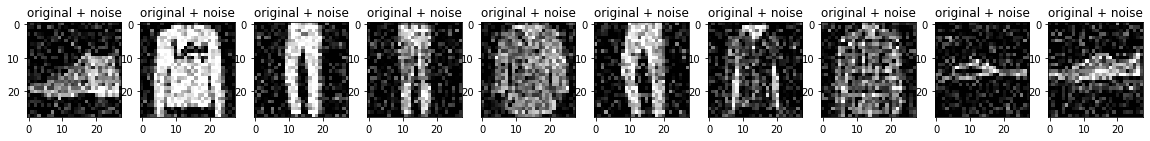

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


   1/1875 [..............................] - ETA: 44:53 - loss: 0.1689

  22/1875 [..............................] - ETA: 4s - loss: 0.1631   

  44/1875 [..............................] - ETA: 4s - loss: 0.1486

  67/1875 [>.............................] - ETA: 4s - loss: 0.1195

  88/1875 [>.............................] - ETA: 4s - loss: 0.0981

 110/1875 [>.............................] - ETA: 4s - loss: 0.0837

 133/1875 [=>............................] - ETA: 4s - loss: 0.0733

 155/1875 [=>............................] - ETA: 3s - loss: 0.0660

 177/1875 [=>............................] - ETA: 3s - loss: 0.0604

 199/1875 [==>...........................] - ETA: 3s - loss: 0.0558

 222/1875 [==>...........................] - ETA: 3s - loss: 0.0520

 244/1875 [==>...........................] - ETA: 3s - loss: 0.0489

 265/1875 [===>..........................] - ETA: 3s - loss: 0.0464

 287/1875 [===>..........................] - ETA: 3s - loss: 0.0441

 309/1875 [===>..........................] - ETA: 3s - loss: 0.0421

 332/1875 [====>.........................] - ETA: 3s - loss: 0.0402

 355/1875 [====>.........................] - ETA: 3s - loss: 0.0386

 377/1875 [=====>........................] - ETA: 3s - loss: 0.0372

 398/1875 [=====>........................] - ETA: 3s - loss: 0.0360

 420/1875 [=====>........................] - ETA: 3s - loss: 0.0349

 442/1875 [======>.......................] - ETA: 3s - loss: 0.0338

 464/1875 [======>.......................] - ETA: 3s - loss: 0.0329

 486/1875 [======>.......................] - ETA: 3s - loss: 0.0320

 507/1875 [=======>......................] - ETA: 3s - loss: 0.0313

 529/1875 [=======>......................] - ETA: 3s - loss: 0.0305

 551/1875 [=======>......................] - ETA: 3s - loss: 0.0298

 574/1875 [========>.....................] - ETA: 3s - loss: 0.0292

 597/1875 [========>.....................] - ETA: 2s - loss: 0.0285

 620/1875 [========>.....................] - ETA: 2s - loss: 0.0279

 643/1875 [=========>....................] - ETA: 2s - loss: 0.0274

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0269

 689/1875 [==========>...................] - ETA: 2s - loss: 0.0264

 712/1875 [==========>...................] - ETA: 2s - loss: 0.0259

 735/1875 [==========>...................] - ETA: 2s - loss: 0.0255

 758/1875 [===========>..................] - ETA: 2s - loss: 0.0251

 781/1875 [===========>..................] - ETA: 2s - loss: 0.0247

 803/1875 [===========>..................] - ETA: 2s - loss: 0.0244

 826/1875 [============>.................] - ETA: 2s - loss: 0.0240

 849/1875 [============>.................] - ETA: 2s - loss: 0.0237

 871/1875 [============>.................] - ETA: 2s - loss: 0.0234

 894/1875 [=============>................] - ETA: 2s - loss: 0.0231

 916/1875 [=============>................] - ETA: 2s - loss: 0.0228

 939/1875 [==============>...............] - ETA: 2s - loss: 0.0225

 962/1875 [==============>...............] - ETA: 2s - loss: 0.0223

 985/1875 [==============>...............] - ETA: 2s - loss: 0.0220

1008/1875 [===============>..............] - ETA: 1s - loss: 0.0218

1031/1875 [===============>..............] - ETA: 1s - loss: 0.0215

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0213

1077/1875 [================>.............] - ETA: 1s - loss: 0.0211

1100/1875 [================>.............] - ETA: 1s - loss: 0.0209

1123/1875 [================>.............] - ETA: 1s - loss: 0.0207

1146/1875 [=================>............] - ETA: 1s - loss: 0.0205

1168/1875 [=================>............] - ETA: 1s - loss: 0.0203

1191/1875 [==================>...........] - ETA: 1s - loss: 0.0201

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0199

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0198

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0196

1279/1875 [===================>..........] - ETA: 1s - loss: 0.0194

1301/1875 [===================>..........] - ETA: 1s - loss: 0.0193

1323/1875 [====================>.........] - ETA: 1s - loss: 0.0191

1345/1875 [====================>.........] - ETA: 1s - loss: 0.0190

1368/1875 [====================>.........] - ETA: 1s - loss: 0.0189

1391/1875 [=====================>........] - ETA: 1s - loss: 0.0187

1414/1875 [=====================>........] - ETA: 1s - loss: 0.0186

1436/1875 [=====================>........] - ETA: 1s - loss: 0.0185

1459/1875 [======================>.......] - ETA: 0s - loss: 0.0183

1482/1875 [======================>.......] - ETA: 0s - loss: 0.0182

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0181

1527/1875 [=======================>......] - ETA: 0s - loss: 0.0180

1549/1875 [=======================>......] - ETA: 0s - loss: 0.0179

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0177

1595/1875 [========================>.....] - ETA: 0s - loss: 0.0176

1617/1875 [========================>.....] - ETA: 0s - loss: 0.0175

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0174

1663/1875 [=========================>....] - ETA: 0s - loss: 0.0173

1686/1875 [=========================>....] - ETA: 0s - loss: 0.0172

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0171

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0170

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0169

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0169

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0168

1819/1875 [============================>.] - ETA: 0s - loss: 0.0167

1840/1875 [============================>.] - ETA: 0s - loss: 0.0166

1861/1875 [============================>.] - ETA: 0s - loss: 0.0165

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - val_loss: 0.0100


Epoch 2/10
   1/1875 [..............................] - ETA: 5s - loss: 0.0098

  23/1875 [..............................] - ETA: 4s - loss: 0.0098

  46/1875 [..............................] - ETA: 4s - loss: 0.0098

  68/1875 [>.............................] - ETA: 4s - loss: 0.0099

  89/1875 [>.............................] - ETA: 4s - loss: 0.0099

 111/1875 [>.............................] - ETA: 4s - loss: 0.0099

 134/1875 [=>............................] - ETA: 3s - loss: 0.0098

 156/1875 [=>............................] - ETA: 3s - loss: 0.0098

 178/1875 [=>............................] - ETA: 3s - loss: 0.0098

 200/1875 [==>...........................] - ETA: 3s - loss: 0.0098

 223/1875 [==>...........................] - ETA: 3s - loss: 0.0098

 246/1875 [==>...........................] - ETA: 3s - loss: 0.0098

 269/1875 [===>..........................] - ETA: 3s - loss: 0.0098

 292/1875 [===>..........................] - ETA: 3s - loss: 0.0098

 315/1875 [====>.........................] - ETA: 3s - loss: 0.0098

 337/1875 [====>.........................] - ETA: 3s - loss: 0.0098

 359/1875 [====>.........................] - ETA: 3s - loss: 0.0098

 381/1875 [=====>........................] - ETA: 3s - loss: 0.0098

 404/1875 [=====>........................] - ETA: 3s - loss: 0.0098

 426/1875 [=====>........................] - ETA: 3s - loss: 0.0098

 448/1875 [======>.......................] - ETA: 3s - loss: 0.0098

 469/1875 [======>.......................] - ETA: 3s - loss: 0.0098

 491/1875 [======>.......................] - ETA: 3s - loss: 0.0098

 513/1875 [=======>......................] - ETA: 3s - loss: 0.0098

 536/1875 [=======>......................] - ETA: 3s - loss: 0.0098

 558/1875 [=======>......................] - ETA: 3s - loss: 0.0097

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0097

 604/1875 [========>.....................] - ETA: 2s - loss: 0.0097

 627/1875 [=========>....................] - ETA: 2s - loss: 0.0097

 650/1875 [=========>....................] - ETA: 2s - loss: 0.0097

 673/1875 [=========>....................] - ETA: 2s - loss: 0.0097

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0097

 715/1875 [==========>...................] - ETA: 2s - loss: 0.0097

 736/1875 [==========>...................] - ETA: 2s - loss: 0.0097

 758/1875 [===========>..................] - ETA: 2s - loss: 0.0097

 780/1875 [===========>..................] - ETA: 2s - loss: 0.0097

 803/1875 [===========>..................] - ETA: 2s - loss: 0.0097

 826/1875 [============>.................] - ETA: 2s - loss: 0.0097

 849/1875 [============>.................] - ETA: 2s - loss: 0.0097

 872/1875 [============>.................] - ETA: 2s - loss: 0.0097

 895/1875 [=============>................] - ETA: 2s - loss: 0.0097

 918/1875 [=============>................] - ETA: 2s - loss: 0.0097

 941/1875 [==============>...............] - ETA: 2s - loss: 0.0097

 964/1875 [==============>...............] - ETA: 2s - loss: 0.0096

 986/1875 [==============>...............] - ETA: 2s - loss: 0.0096

1009/1875 [===============>..............] - ETA: 1s - loss: 0.0096

1032/1875 [===============>..............] - ETA: 1s - loss: 0.0096

1055/1875 [===============>..............] - ETA: 1s - loss: 0.0096

1077/1875 [================>.............] - ETA: 1s - loss: 0.0096

1100/1875 [================>.............] - ETA: 1s - loss: 0.0096

1123/1875 [================>.............] - ETA: 1s - loss: 0.0096

1146/1875 [=================>............] - ETA: 1s - loss: 0.0096

1169/1875 [=================>............] - ETA: 1s - loss: 0.0096

1192/1875 [==================>...........] - ETA: 1s - loss: 0.0096

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0096

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0096

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0096

1282/1875 [===================>..........] - ETA: 1s - loss: 0.0096

1304/1875 [===================>..........] - ETA: 1s - loss: 0.0096

1326/1875 [====================>.........] - ETA: 1s - loss: 0.0096

1349/1875 [====================>.........] - ETA: 1s - loss: 0.0096

1371/1875 [====================>.........] - ETA: 1s - loss: 0.0096

1393/1875 [=====================>........] - ETA: 1s - loss: 0.0096

1416/1875 [=====================>........] - ETA: 1s - loss: 0.0095

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0095

1507/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0095

1575/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1621/1875 [========================>.....] - ETA: 0s - loss: 0.0095

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0095

1688/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0095

1755/1875 [===========================>..] - ETA: 0s - loss: 0.0095

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0094

1798/1875 [===========================>..] - ETA: 0s - loss: 0.0094

1821/1875 [============================>.] - ETA: 0s - loss: 0.0094

1844/1875 [============================>.] - ETA: 0s - loss: 0.0094

1866/1875 [============================>.] - ETA: 0s - loss: 0.0094

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0089


Epoch 3/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0082

  22/1875 [..............................] - ETA: 4s - loss: 0.0088

  44/1875 [..............................] - ETA: 4s - loss: 0.0088

  67/1875 [>.............................] - ETA: 4s - loss: 0.0087

  89/1875 [>.............................] - ETA: 4s - loss: 0.0087

 111/1875 [>.............................] - ETA: 4s - loss: 0.0087

 134/1875 [=>............................] - ETA: 3s - loss: 0.0087

 157/1875 [=>............................] - ETA: 3s - loss: 0.0087

 180/1875 [=>............................] - ETA: 3s - loss: 0.0087

 203/1875 [==>...........................] - ETA: 3s - loss: 0.0087

 226/1875 [==>...........................] - ETA: 3s - loss: 0.0087

 249/1875 [==>...........................] - ETA: 3s - loss: 0.0087

 272/1875 [===>..........................] - ETA: 3s - loss: 0.0087

 295/1875 [===>..........................] - ETA: 3s - loss: 0.0087

 318/1875 [====>.........................] - ETA: 3s - loss: 0.0087

 341/1875 [====>.........................] - ETA: 3s - loss: 0.0087

 364/1875 [====>.........................] - ETA: 3s - loss: 0.0087

 386/1875 [=====>........................] - ETA: 3s - loss: 0.0087

 408/1875 [=====>........................] - ETA: 3s - loss: 0.0087

 431/1875 [=====>........................] - ETA: 3s - loss: 0.0087

 453/1875 [======>.......................] - ETA: 3s - loss: 0.0087

 474/1875 [======>.......................] - ETA: 3s - loss: 0.0087

 495/1875 [======>.......................] - ETA: 3s - loss: 0.0087

 516/1875 [=======>......................] - ETA: 3s - loss: 0.0087

 537/1875 [=======>......................] - ETA: 3s - loss: 0.0087

 558/1875 [=======>......................] - ETA: 3s - loss: 0.0087

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0087

 603/1875 [========>.....................] - ETA: 2s - loss: 0.0086

 626/1875 [=========>....................] - ETA: 2s - loss: 0.0086

 649/1875 [=========>....................] - ETA: 2s - loss: 0.0086

 672/1875 [=========>....................] - ETA: 2s - loss: 0.0086

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0086

 717/1875 [==========>...................] - ETA: 2s - loss: 0.0086

 740/1875 [==========>...................] - ETA: 2s - loss: 0.0086

 763/1875 [===========>..................] - ETA: 2s - loss: 0.0086

 786/1875 [===========>..................] - ETA: 2s - loss: 0.0086

 809/1875 [===========>..................] - ETA: 2s - loss: 0.0086

 832/1875 [============>.................] - ETA: 2s - loss: 0.0086

 854/1875 [============>.................] - ETA: 2s - loss: 0.0086

 877/1875 [=============>................] - ETA: 2s - loss: 0.0086

 900/1875 [=============>................] - ETA: 2s - loss: 0.0086

 922/1875 [=============>................] - ETA: 2s - loss: 0.0086

 945/1875 [==============>...............] - ETA: 2s - loss: 0.0086

 967/1875 [==============>...............] - ETA: 2s - loss: 0.0085

 989/1875 [==============>...............] - ETA: 2s - loss: 0.0085

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0085

1033/1875 [===============>..............] - ETA: 1s - loss: 0.0085

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0085

1076/1875 [================>.............] - ETA: 1s - loss: 0.0085

1099/1875 [================>.............] - ETA: 1s - loss: 0.0085

1122/1875 [================>.............] - ETA: 1s - loss: 0.0085

1145/1875 [=================>............] - ETA: 1s - loss: 0.0085

1168/1875 [=================>............] - ETA: 1s - loss: 0.0085

1191/1875 [==================>...........] - ETA: 1s - loss: 0.0085

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0085

1237/1875 [==================>...........] - ETA: 1s - loss: 0.0085

1260/1875 [===================>..........] - ETA: 1s - loss: 0.0085

1283/1875 [===================>..........] - ETA: 1s - loss: 0.0085

1306/1875 [===================>..........] - ETA: 1s - loss: 0.0085

1329/1875 [====================>.........] - ETA: 1s - loss: 0.0085

1352/1875 [====================>.........] - ETA: 1s - loss: 0.0084

1375/1875 [=====================>........] - ETA: 1s - loss: 0.0084

1397/1875 [=====================>........] - ETA: 1s - loss: 0.0084

1419/1875 [=====================>........] - ETA: 1s - loss: 0.0084

1440/1875 [======================>.......] - ETA: 0s - loss: 0.0084

1462/1875 [======================>.......] - ETA: 0s - loss: 0.0084

1485/1875 [======================>.......] - ETA: 0s - loss: 0.0084

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0084

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0084

1554/1875 [=======================>......] - ETA: 0s - loss: 0.0084

1576/1875 [========================>.....] - ETA: 0s - loss: 0.0084

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0084

1621/1875 [========================>.....] - ETA: 0s - loss: 0.0084

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0084

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0084

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0084

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0084

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0084

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0084

1778/1875 [===========================>..] - ETA: 0s - loss: 0.0084

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0084

1822/1875 [============================>.] - ETA: 0s - loss: 0.0084

1845/1875 [============================>.] - ETA: 0s - loss: 0.0083

1867/1875 [============================>.] - ETA: 0s - loss: 0.0083

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0083 - val_loss: 0.0081


Epoch 4/10
   1/1875 [..............................] - ETA: 5s - loss: 0.0078

  23/1875 [..............................] - ETA: 4s - loss: 0.0077

  45/1875 [..............................] - ETA: 4s - loss: 0.0078

  66/1875 [>.............................] - ETA: 4s - loss: 0.0079

  87/1875 [>.............................] - ETA: 4s - loss: 0.0079

 109/1875 [>.............................] - ETA: 4s - loss: 0.0079

 132/1875 [=>............................] - ETA: 4s - loss: 0.0079

 155/1875 [=>............................] - ETA: 3s - loss: 0.0079

 177/1875 [=>............................] - ETA: 3s - loss: 0.0079

 199/1875 [==>...........................] - ETA: 3s - loss: 0.0079

 221/1875 [==>...........................] - ETA: 3s - loss: 0.0079

 244/1875 [==>...........................] - ETA: 3s - loss: 0.0079

 266/1875 [===>..........................] - ETA: 3s - loss: 0.0079

 289/1875 [===>..........................] - ETA: 3s - loss: 0.0079

 312/1875 [===>..........................] - ETA: 3s - loss: 0.0080

 335/1875 [====>.........................] - ETA: 3s - loss: 0.0080

 358/1875 [====>.........................] - ETA: 3s - loss: 0.0079

 381/1875 [=====>........................] - ETA: 3s - loss: 0.0079

 404/1875 [=====>........................] - ETA: 3s - loss: 0.0079

 427/1875 [=====>........................] - ETA: 3s - loss: 0.0079

 450/1875 [======>.......................] - ETA: 3s - loss: 0.0079

 472/1875 [======>.......................] - ETA: 3s - loss: 0.0079

 494/1875 [======>.......................] - ETA: 3s - loss: 0.0079

 517/1875 [=======>......................] - ETA: 3s - loss: 0.0079

 540/1875 [=======>......................] - ETA: 3s - loss: 0.0079

 562/1875 [=======>......................] - ETA: 3s - loss: 0.0079

 583/1875 [========>.....................] - ETA: 2s - loss: 0.0079

 606/1875 [========>.....................] - ETA: 2s - loss: 0.0079

 629/1875 [=========>....................] - ETA: 2s - loss: 0.0079

 652/1875 [=========>....................] - ETA: 2s - loss: 0.0079

 674/1875 [=========>....................] - ETA: 2s - loss: 0.0079

 696/1875 [==========>...................] - ETA: 2s - loss: 0.0079

 718/1875 [==========>...................] - ETA: 2s - loss: 0.0079

 740/1875 [==========>...................] - ETA: 2s - loss: 0.0079

 763/1875 [===========>..................] - ETA: 2s - loss: 0.0079

 785/1875 [===========>..................] - ETA: 2s - loss: 0.0079

 807/1875 [===========>..................] - ETA: 2s - loss: 0.0079

 829/1875 [============>.................] - ETA: 2s - loss: 0.0079

 851/1875 [============>.................] - ETA: 2s - loss: 0.0079

 873/1875 [============>.................] - ETA: 2s - loss: 0.0079

 896/1875 [=============>................] - ETA: 2s - loss: 0.0079

 919/1875 [=============>................] - ETA: 2s - loss: 0.0079

 942/1875 [==============>...............] - ETA: 2s - loss: 0.0079

 965/1875 [==============>...............] - ETA: 2s - loss: 0.0079

 988/1875 [==============>...............] - ETA: 2s - loss: 0.0079

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1033/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1056/1875 [===============>..............] - ETA: 1s - loss: 0.0079

1079/1875 [================>.............] - ETA: 1s - loss: 0.0079

1101/1875 [================>.............] - ETA: 1s - loss: 0.0079

1123/1875 [================>.............] - ETA: 1s - loss: 0.0079

1145/1875 [=================>............] - ETA: 1s - loss: 0.0079

1168/1875 [=================>............] - ETA: 1s - loss: 0.0079

1191/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1236/1875 [==================>...........] - ETA: 1s - loss: 0.0079

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1282/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1305/1875 [===================>..........] - ETA: 1s - loss: 0.0079

1328/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1351/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1374/1875 [====================>.........] - ETA: 1s - loss: 0.0079

1397/1875 [=====================>........] - ETA: 1s - loss: 0.0079

1419/1875 [=====================>........] - ETA: 1s - loss: 0.0078

1442/1875 [======================>.......] - ETA: 0s - loss: 0.0078

1465/1875 [======================>.......] - ETA: 0s - loss: 0.0078

1488/1875 [======================>.......] - ETA: 0s - loss: 0.0078

1511/1875 [=======================>......] - ETA: 0s - loss: 0.0078

1534/1875 [=======================>......] - ETA: 0s - loss: 0.0078

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0078

1578/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1599/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1621/1875 [========================>.....] - ETA: 0s - loss: 0.0078

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0078

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0078

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0078

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0078

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0078

1756/1875 [===========================>..] - ETA: 0s - loss: 0.0078

1778/1875 [===========================>..] - ETA: 0s - loss: 0.0078

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0078

1823/1875 [============================>.] - ETA: 0s - loss: 0.0078

1846/1875 [============================>.] - ETA: 0s - loss: 0.0078

1869/1875 [============================>.] - ETA: 0s - loss: 0.0078

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - val_loss: 0.0077


Epoch 5/10
   1/1875 [..............................] - ETA: 5s - loss: 0.0079

  24/1875 [..............................] - ETA: 4s - loss: 0.0075

  46/1875 [..............................] - ETA: 4s - loss: 0.0075

  68/1875 [>.............................] - ETA: 4s - loss: 0.0075

  88/1875 [>.............................] - ETA: 4s - loss: 0.0075

 108/1875 [>.............................] - ETA: 4s - loss: 0.0076

 128/1875 [=>............................] - ETA: 4s - loss: 0.0076

 148/1875 [=>............................] - ETA: 4s - loss: 0.0076

 169/1875 [=>............................] - ETA: 4s - loss: 0.0076

 190/1875 [==>...........................] - ETA: 4s - loss: 0.0076

 211/1875 [==>...........................] - ETA: 4s - loss: 0.0076

 232/1875 [==>...........................] - ETA: 3s - loss: 0.0076

 253/1875 [===>..........................] - ETA: 3s - loss: 0.0077

 274/1875 [===>..........................] - ETA: 3s - loss: 0.0077

 296/1875 [===>..........................] - ETA: 3s - loss: 0.0076

 318/1875 [====>.........................] - ETA: 3s - loss: 0.0076

 341/1875 [====>.........................] - ETA: 3s - loss: 0.0076

 363/1875 [====>.........................] - ETA: 3s - loss: 0.0076

 385/1875 [=====>........................] - ETA: 3s - loss: 0.0076

 407/1875 [=====>........................] - ETA: 3s - loss: 0.0077

 429/1875 [=====>........................] - ETA: 3s - loss: 0.0077

 452/1875 [======>.......................] - ETA: 3s - loss: 0.0076

 474/1875 [======>.......................] - ETA: 3s - loss: 0.0077

 497/1875 [======>.......................] - ETA: 3s - loss: 0.0077

 520/1875 [=======>......................] - ETA: 3s - loss: 0.0077

 543/1875 [=======>......................] - ETA: 3s - loss: 0.0076

 566/1875 [========>.....................] - ETA: 3s - loss: 0.0076

 588/1875 [========>.....................] - ETA: 3s - loss: 0.0076

 609/1875 [========>.....................] - ETA: 2s - loss: 0.0076

 632/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 655/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 678/1875 [=========>....................] - ETA: 2s - loss: 0.0076

 700/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 721/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 743/1875 [==========>...................] - ETA: 2s - loss: 0.0076

 766/1875 [===========>..................] - ETA: 2s - loss: 0.0076

 787/1875 [===========>..................] - ETA: 2s - loss: 0.0076

 809/1875 [===========>..................] - ETA: 2s - loss: 0.0076

 832/1875 [============>.................] - ETA: 2s - loss: 0.0076

 855/1875 [============>.................] - ETA: 2s - loss: 0.0076

 878/1875 [=============>................] - ETA: 2s - loss: 0.0076

 900/1875 [=============>................] - ETA: 2s - loss: 0.0076

 923/1875 [=============>................] - ETA: 2s - loss: 0.0076

 946/1875 [==============>...............] - ETA: 2s - loss: 0.0076

 968/1875 [==============>...............] - ETA: 2s - loss: 0.0076

 991/1875 [==============>...............] - ETA: 2s - loss: 0.0076

1014/1875 [===============>..............] - ETA: 2s - loss: 0.0076

1037/1875 [===============>..............] - ETA: 1s - loss: 0.0076

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0076

1082/1875 [================>.............] - ETA: 1s - loss: 0.0076

1104/1875 [================>.............] - ETA: 1s - loss: 0.0076

1127/1875 [=================>............] - ETA: 1s - loss: 0.0076

1150/1875 [=================>............] - ETA: 1s - loss: 0.0076

1173/1875 [=================>............] - ETA: 1s - loss: 0.0076

1196/1875 [==================>...........] - ETA: 1s - loss: 0.0076

1219/1875 [==================>...........] - ETA: 1s - loss: 0.0076

1241/1875 [==================>...........] - ETA: 1s - loss: 0.0076

1264/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1286/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1309/1875 [===================>..........] - ETA: 1s - loss: 0.0076

1331/1875 [====================>.........] - ETA: 1s - loss: 0.0076

1352/1875 [====================>.........] - ETA: 1s - loss: 0.0076

1373/1875 [====================>.........] - ETA: 1s - loss: 0.0076

1395/1875 [=====================>........] - ETA: 1s - loss: 0.0076

1416/1875 [=====================>........] - ETA: 1s - loss: 0.0076

1438/1875 [======================>.......] - ETA: 1s - loss: 0.0076

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0076

1484/1875 [======================>.......] - ETA: 0s - loss: 0.0076

1507/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0076

1575/1875 [========================>.....] - ETA: 0s - loss: 0.0076

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0076

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0075

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0075

1662/1875 [=========================>....] - ETA: 0s - loss: 0.0075

1685/1875 [=========================>....] - ETA: 0s - loss: 0.0075

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0075

1731/1875 [==========================>...] - ETA: 0s - loss: 0.0075

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1777/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0075

1823/1875 [============================>.] - ETA: 0s - loss: 0.0076

1846/1875 [============================>.] - ETA: 0s - loss: 0.0076

1868/1875 [============================>.] - ETA: 0s - loss: 0.0076

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - val_loss: 0.0075


Epoch 6/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0070

  24/1875 [..............................] - ETA: 4s - loss: 0.0075

  46/1875 [..............................] - ETA: 4s - loss: 0.0075

  68/1875 [>.............................] - ETA: 4s - loss: 0.0075

  91/1875 [>.............................] - ETA: 4s - loss: 0.0074

 114/1875 [>.............................] - ETA: 3s - loss: 0.0075

 136/1875 [=>............................] - ETA: 3s - loss: 0.0075

 159/1875 [=>............................] - ETA: 3s - loss: 0.0074

 182/1875 [=>............................] - ETA: 3s - loss: 0.0075

 205/1875 [==>...........................] - ETA: 3s - loss: 0.0074

 228/1875 [==>...........................] - ETA: 3s - loss: 0.0074

 251/1875 [===>..........................] - ETA: 3s - loss: 0.0074

 274/1875 [===>..........................] - ETA: 3s - loss: 0.0074

 297/1875 [===>..........................] - ETA: 3s - loss: 0.0074

 320/1875 [====>.........................] - ETA: 3s - loss: 0.0075

 343/1875 [====>.........................] - ETA: 3s - loss: 0.0074

 366/1875 [====>.........................] - ETA: 3s - loss: 0.0074

 388/1875 [=====>........................] - ETA: 3s - loss: 0.0074

 410/1875 [=====>........................] - ETA: 3s - loss: 0.0074

 431/1875 [=====>........................] - ETA: 3s - loss: 0.0075

 452/1875 [======>.......................] - ETA: 3s - loss: 0.0075

 475/1875 [======>.......................] - ETA: 3s - loss: 0.0075

 498/1875 [======>.......................] - ETA: 3s - loss: 0.0075

 521/1875 [=======>......................] - ETA: 3s - loss: 0.0075

 544/1875 [=======>......................] - ETA: 3s - loss: 0.0075

 567/1875 [========>.....................] - ETA: 2s - loss: 0.0075

 590/1875 [========>.....................] - ETA: 2s - loss: 0.0074

 613/1875 [========>.....................] - ETA: 2s - loss: 0.0075

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0075

 659/1875 [=========>....................] - ETA: 2s - loss: 0.0074

 682/1875 [=========>....................] - ETA: 2s - loss: 0.0074

 705/1875 [==========>...................] - ETA: 2s - loss: 0.0074

 728/1875 [==========>...................] - ETA: 2s - loss: 0.0074

 751/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 774/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 797/1875 [===========>..................] - ETA: 2s - loss: 0.0074

 820/1875 [============>.................] - ETA: 2s - loss: 0.0074

 842/1875 [============>.................] - ETA: 2s - loss: 0.0074

 865/1875 [============>.................] - ETA: 2s - loss: 0.0074

 887/1875 [=============>................] - ETA: 2s - loss: 0.0074

 909/1875 [=============>................] - ETA: 2s - loss: 0.0074

 931/1875 [=============>................] - ETA: 2s - loss: 0.0074

 953/1875 [==============>...............] - ETA: 2s - loss: 0.0074

 975/1875 [==============>...............] - ETA: 2s - loss: 0.0074

 997/1875 [==============>...............] - ETA: 1s - loss: 0.0074

1019/1875 [===============>..............] - ETA: 1s - loss: 0.0074

1041/1875 [===============>..............] - ETA: 1s - loss: 0.0074

1064/1875 [================>.............] - ETA: 1s - loss: 0.0074

1087/1875 [================>.............] - ETA: 1s - loss: 0.0074

1110/1875 [================>.............] - ETA: 1s - loss: 0.0074

1133/1875 [=================>............] - ETA: 1s - loss: 0.0074

1156/1875 [=================>............] - ETA: 1s - loss: 0.0074

1179/1875 [=================>............] - ETA: 1s - loss: 0.0074

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1225/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1248/1875 [==================>...........] - ETA: 1s - loss: 0.0074

1270/1875 [===================>..........] - ETA: 1s - loss: 0.0074

1292/1875 [===================>..........] - ETA: 1s - loss: 0.0074

1315/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1337/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1358/1875 [====================>.........] - ETA: 1s - loss: 0.0074

1381/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1401/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1423/1875 [=====================>........] - ETA: 1s - loss: 0.0074

1445/1875 [======================>.......] - ETA: 0s - loss: 0.0074

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0074

1488/1875 [======================>.......] - ETA: 0s - loss: 0.0074

1511/1875 [=======================>......] - ETA: 0s - loss: 0.0074

1534/1875 [=======================>......] - ETA: 0s - loss: 0.0074

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0074

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0074

1603/1875 [========================>.....] - ETA: 0s - loss: 0.0074

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0074

1649/1875 [=========================>....] - ETA: 0s - loss: 0.0074

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0074

1695/1875 [==========================>...] - ETA: 0s - loss: 0.0074

1717/1875 [==========================>...] - ETA: 0s - loss: 0.0074

1738/1875 [==========================>...] - ETA: 0s - loss: 0.0074

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0074

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0074

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0074

1828/1875 [============================>.] - ETA: 0s - loss: 0.0074

1850/1875 [============================>.] - ETA: 0s - loss: 0.0074

1873/1875 [============================>.] - ETA: 0s - loss: 0.0074

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0074 - val_loss: 0.0074


Epoch 7/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0083

  24/1875 [..............................] - ETA: 4s - loss: 0.0072

  47/1875 [..............................] - ETA: 4s - loss: 0.0073

  70/1875 [>.............................] - ETA: 4s - loss: 0.0072

  93/1875 [>.............................] - ETA: 3s - loss: 0.0072

 115/1875 [>.............................] - ETA: 3s - loss: 0.0073

 136/1875 [=>............................] - ETA: 3s - loss: 0.0072

 159/1875 [=>............................] - ETA: 3s - loss: 0.0073

 182/1875 [=>............................] - ETA: 3s - loss: 0.0073

 205/1875 [==>...........................] - ETA: 3s - loss: 0.0073

 228/1875 [==>...........................] - ETA: 3s - loss: 0.0073

 250/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 273/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 296/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 319/1875 [====>.........................] - ETA: 3s - loss: 0.0073

 342/1875 [====>.........................] - ETA: 3s - loss: 0.0073

 365/1875 [====>.........................] - ETA: 3s - loss: 0.0073

 388/1875 [=====>........................] - ETA: 3s - loss: 0.0073

 411/1875 [=====>........................] - ETA: 3s - loss: 0.0073

 434/1875 [=====>........................] - ETA: 3s - loss: 0.0073

 457/1875 [======>.......................] - ETA: 3s - loss: 0.0073

 480/1875 [======>.......................] - ETA: 3s - loss: 0.0073

 503/1875 [=======>......................] - ETA: 3s - loss: 0.0073

 526/1875 [=======>......................] - ETA: 3s - loss: 0.0073

 549/1875 [=======>......................] - ETA: 2s - loss: 0.0073

 572/1875 [========>.....................] - ETA: 2s - loss: 0.0073

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0073

 618/1875 [========>.....................] - ETA: 2s - loss: 0.0073

 639/1875 [=========>....................] - ETA: 2s - loss: 0.0073

 662/1875 [=========>....................] - ETA: 2s - loss: 0.0073

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0073

 706/1875 [==========>...................] - ETA: 2s - loss: 0.0073

 729/1875 [==========>...................] - ETA: 2s - loss: 0.0073

 752/1875 [===========>..................] - ETA: 2s - loss: 0.0073

 775/1875 [===========>..................] - ETA: 2s - loss: 0.0073

 798/1875 [===========>..................] - ETA: 2s - loss: 0.0073

 821/1875 [============>.................] - ETA: 2s - loss: 0.0073

 843/1875 [============>.................] - ETA: 2s - loss: 0.0073

 865/1875 [============>.................] - ETA: 2s - loss: 0.0073

 888/1875 [=============>................] - ETA: 2s - loss: 0.0073

 911/1875 [=============>................] - ETA: 2s - loss: 0.0073

 934/1875 [=============>................] - ETA: 2s - loss: 0.0073

 957/1875 [==============>...............] - ETA: 2s - loss: 0.0073

 980/1875 [==============>...............] - ETA: 2s - loss: 0.0073

1002/1875 [===============>..............] - ETA: 1s - loss: 0.0073

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0073

1047/1875 [===============>..............] - ETA: 1s - loss: 0.0073

1070/1875 [================>.............] - ETA: 1s - loss: 0.0073

1093/1875 [================>.............] - ETA: 1s - loss: 0.0073

1115/1875 [================>.............] - ETA: 1s - loss: 0.0073

1137/1875 [=================>............] - ETA: 1s - loss: 0.0073

1159/1875 [=================>............] - ETA: 1s - loss: 0.0073

1182/1875 [=================>............] - ETA: 1s - loss: 0.0073

1205/1875 [==================>...........] - ETA: 1s - loss: 0.0073

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0073

1251/1875 [===================>..........] - ETA: 1s - loss: 0.0073

1274/1875 [===================>..........] - ETA: 1s - loss: 0.0073

1297/1875 [===================>..........] - ETA: 1s - loss: 0.0073

1319/1875 [====================>.........] - ETA: 1s - loss: 0.0073

1342/1875 [====================>.........] - ETA: 1s - loss: 0.0073

1365/1875 [====================>.........] - ETA: 1s - loss: 0.0073

1388/1875 [=====================>........] - ETA: 1s - loss: 0.0073

1411/1875 [=====================>........] - ETA: 1s - loss: 0.0073

1433/1875 [=====================>........] - ETA: 1s - loss: 0.0073

1456/1875 [======================>.......] - ETA: 0s - loss: 0.0073

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0073

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1547/1875 [=======================>......] - ETA: 0s - loss: 0.0073

1570/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1592/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0073

1637/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0073

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0073

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0073

1750/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0073

1819/1875 [============================>.] - ETA: 0s - loss: 0.0073

1841/1875 [============================>.] - ETA: 0s - loss: 0.0073

1864/1875 [============================>.] - ETA: 0s - loss: 0.0073

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0073 - val_loss: 0.0073


Epoch 8/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0061

  24/1875 [..............................] - ETA: 4s - loss: 0.0071

  47/1875 [..............................] - ETA: 4s - loss: 0.0071

  70/1875 [>.............................] - ETA: 4s - loss: 0.0071

  93/1875 [>.............................] - ETA: 3s - loss: 0.0072

 115/1875 [>.............................] - ETA: 3s - loss: 0.0072

 138/1875 [=>............................] - ETA: 3s - loss: 0.0072

 161/1875 [=>............................] - ETA: 3s - loss: 0.0072

 184/1875 [=>............................] - ETA: 3s - loss: 0.0072

 207/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 230/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 253/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 276/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 299/1875 [===>..........................] - ETA: 3s - loss: 0.0073

 321/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 343/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 364/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 386/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 409/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 431/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 454/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 477/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 500/1875 [=======>......................] - ETA: 3s - loss: 0.0072

 523/1875 [=======>......................] - ETA: 3s - loss: 0.0072

 546/1875 [=======>......................] - ETA: 3s - loss: 0.0072

 569/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 592/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 615/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 638/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 661/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 707/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 730/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 753/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 775/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 798/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 820/1875 [============>.................] - ETA: 2s - loss: 0.0072

 843/1875 [============>.................] - ETA: 2s - loss: 0.0072

 866/1875 [============>.................] - ETA: 2s - loss: 0.0072

 889/1875 [=============>................] - ETA: 2s - loss: 0.0072

 912/1875 [=============>................] - ETA: 2s - loss: 0.0072

 935/1875 [=============>................] - ETA: 2s - loss: 0.0072

 958/1875 [==============>...............] - ETA: 2s - loss: 0.0072

 981/1875 [==============>...............] - ETA: 2s - loss: 0.0072

1004/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1027/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1050/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1073/1875 [================>.............] - ETA: 1s - loss: 0.0072

1096/1875 [================>.............] - ETA: 1s - loss: 0.0072

1119/1875 [================>.............] - ETA: 1s - loss: 0.0072

1141/1875 [=================>............] - ETA: 1s - loss: 0.0072

1163/1875 [=================>............] - ETA: 1s - loss: 0.0072

1185/1875 [=================>............] - ETA: 1s - loss: 0.0072

1208/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1231/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1297/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1318/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1340/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1363/1875 [====================>.........] - ETA: 1s - loss: 0.0072

1386/1875 [=====================>........] - ETA: 1s - loss: 0.0072

1409/1875 [=====================>........] - ETA: 1s - loss: 0.0072

1432/1875 [=====================>........] - ETA: 1s - loss: 0.0072

1455/1875 [======================>.......] - ETA: 0s - loss: 0.0072

1477/1875 [======================>.......] - ETA: 0s - loss: 0.0072

1500/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0072

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0072

1588/1875 [========================>.....] - ETA: 0s - loss: 0.0072

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0072

1633/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1656/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0072

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1746/1875 [==========================>...] - ETA: 0s - loss: 0.0072

1768/1875 [===========================>..] - ETA: 0s - loss: 0.0072

1791/1875 [===========================>..] - ETA: 0s - loss: 0.0072

1814/1875 [============================>.] - ETA: 0s - loss: 0.0072

1837/1875 [============================>.] - ETA: 0s - loss: 0.0072

1860/1875 [============================>.] - ETA: 0s - loss: 0.0072

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0072 - val_loss: 0.0073


Epoch 9/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0078

  24/1875 [..............................] - ETA: 4s - loss: 0.0072

  47/1875 [..............................] - ETA: 4s - loss: 0.0072

  69/1875 [>.............................] - ETA: 4s - loss: 0.0072

  90/1875 [>.............................] - ETA: 4s - loss: 0.0072

 112/1875 [>.............................] - ETA: 4s - loss: 0.0072

 134/1875 [=>............................] - ETA: 4s - loss: 0.0072

 156/1875 [=>............................] - ETA: 3s - loss: 0.0072

 179/1875 [=>............................] - ETA: 3s - loss: 0.0072

 202/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 225/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 248/1875 [==>...........................] - ETA: 3s - loss: 0.0072

 271/1875 [===>..........................] - ETA: 3s - loss: 0.0072

 294/1875 [===>..........................] - ETA: 3s - loss: 0.0072

 317/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 340/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 363/1875 [====>.........................] - ETA: 3s - loss: 0.0072

 385/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 407/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 430/1875 [=====>........................] - ETA: 3s - loss: 0.0072

 452/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 474/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 496/1875 [======>.......................] - ETA: 3s - loss: 0.0072

 518/1875 [=======>......................] - ETA: 3s - loss: 0.0072

 540/1875 [=======>......................] - ETA: 3s - loss: 0.0072

 562/1875 [=======>......................] - ETA: 2s - loss: 0.0072

 583/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0072

 626/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 648/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 669/1875 [=========>....................] - ETA: 2s - loss: 0.0072

 691/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 712/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 735/1875 [==========>...................] - ETA: 2s - loss: 0.0072

 757/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 780/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 802/1875 [===========>..................] - ETA: 2s - loss: 0.0072

 824/1875 [============>.................] - ETA: 2s - loss: 0.0072

 847/1875 [============>.................] - ETA: 2s - loss: 0.0072

 870/1875 [============>.................] - ETA: 2s - loss: 0.0072

 893/1875 [=============>................] - ETA: 2s - loss: 0.0072

 915/1875 [=============>................] - ETA: 2s - loss: 0.0072

 937/1875 [=============>................] - ETA: 2s - loss: 0.0072

 960/1875 [==============>...............] - ETA: 2s - loss: 0.0072

 982/1875 [==============>...............] - ETA: 2s - loss: 0.0072

1003/1875 [===============>..............] - ETA: 2s - loss: 0.0072

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1047/1875 [===============>..............] - ETA: 1s - loss: 0.0072

1070/1875 [================>.............] - ETA: 1s - loss: 0.0072

1092/1875 [================>.............] - ETA: 1s - loss: 0.0072

1114/1875 [================>.............] - ETA: 1s - loss: 0.0072

1137/1875 [=================>............] - ETA: 1s - loss: 0.0072

1159/1875 [=================>............] - ETA: 1s - loss: 0.0072

1180/1875 [=================>............] - ETA: 1s - loss: 0.0072

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1225/1875 [==================>...........] - ETA: 1s - loss: 0.0072

1246/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1267/1875 [===================>..........] - ETA: 1s - loss: 0.0072

1289/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1310/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1331/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1352/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1374/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1396/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1418/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1438/1875 [======================>.......] - ETA: 1s - loss: 0.0071

1460/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1481/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1545/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1635/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1657/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1786/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1829/1875 [============================>.] - ETA: 0s - loss: 0.0071

1851/1875 [============================>.] - ETA: 0s - loss: 0.0071

1873/1875 [============================>.] - ETA: 0s - loss: 0.0071

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - val_loss: 0.0072


Epoch 10/10
   1/1875 [..............................] - ETA: 5s - loss: 0.0074

  24/1875 [..............................] - ETA: 4s - loss: 0.0069

  46/1875 [..............................] - ETA: 4s - loss: 0.0069

  68/1875 [>.............................] - ETA: 4s - loss: 0.0070

  90/1875 [>.............................] - ETA: 4s - loss: 0.0071

 113/1875 [>.............................] - ETA: 4s - loss: 0.0070

 134/1875 [=>............................] - ETA: 4s - loss: 0.0071

 156/1875 [=>............................] - ETA: 3s - loss: 0.0071

 178/1875 [=>............................] - ETA: 3s - loss: 0.0071

 201/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 224/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 246/1875 [==>...........................] - ETA: 3s - loss: 0.0071

 268/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 291/1875 [===>..........................] - ETA: 3s - loss: 0.0071

 314/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 337/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 360/1875 [====>.........................] - ETA: 3s - loss: 0.0071

 382/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 404/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 425/1875 [=====>........................] - ETA: 3s - loss: 0.0071

 448/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 471/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 493/1875 [======>.......................] - ETA: 3s - loss: 0.0071

 515/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 537/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 558/1875 [=======>......................] - ETA: 3s - loss: 0.0071

 580/1875 [========>.....................] - ETA: 2s - loss: 0.0071

 603/1875 [========>.....................] - ETA: 2s - loss: 0.0071

 626/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 649/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 670/1875 [=========>....................] - ETA: 2s - loss: 0.0071

 691/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 713/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 735/1875 [==========>...................] - ETA: 2s - loss: 0.0071

 757/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 779/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 801/1875 [===========>..................] - ETA: 2s - loss: 0.0071

 824/1875 [============>.................] - ETA: 2s - loss: 0.0071

 847/1875 [============>.................] - ETA: 2s - loss: 0.0071

 870/1875 [============>.................] - ETA: 2s - loss: 0.0071

 893/1875 [=============>................] - ETA: 2s - loss: 0.0071

 915/1875 [=============>................] - ETA: 2s - loss: 0.0071

 938/1875 [==============>...............] - ETA: 2s - loss: 0.0071

 960/1875 [==============>...............] - ETA: 2s - loss: 0.0071

 982/1875 [==============>...............] - ETA: 2s - loss: 0.0071

1004/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1026/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1048/1875 [===============>..............] - ETA: 1s - loss: 0.0071

1071/1875 [================>.............] - ETA: 1s - loss: 0.0071

1093/1875 [================>.............] - ETA: 1s - loss: 0.0071

1114/1875 [================>.............] - ETA: 1s - loss: 0.0071

1136/1875 [=================>............] - ETA: 1s - loss: 0.0071

1159/1875 [=================>............] - ETA: 1s - loss: 0.0071

1182/1875 [=================>............] - ETA: 1s - loss: 0.0071

1205/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0071

1251/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1273/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1296/1875 [===================>..........] - ETA: 1s - loss: 0.0071

1319/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1341/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1363/1875 [====================>.........] - ETA: 1s - loss: 0.0071

1385/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1408/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1431/1875 [=====================>........] - ETA: 1s - loss: 0.0071

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1477/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1499/1875 [======================>.......] - ETA: 0s - loss: 0.0071

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1541/1875 [=======================>......] - ETA: 0s - loss: 0.0071

1564/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1609/1875 [========================>.....] - ETA: 0s - loss: 0.0071

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1655/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0071

1701/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1723/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1746/1875 [==========================>...] - ETA: 0s - loss: 0.0071

1768/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0071

1835/1875 [============================>.] - ETA: 0s - loss: 0.0071

1858/1875 [============================>.] - ETA: 0s - loss: 0.0071

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - val_loss: 0.0071


Let's take a look at a summary of the encoder. Notice how the images are downsampled from 28x28 to 7x7.

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


The decoder upsamples the images back from 7x7 to 28x28.

In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Plotting both the noisy images and the denoised images produced by the autoencoder.

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

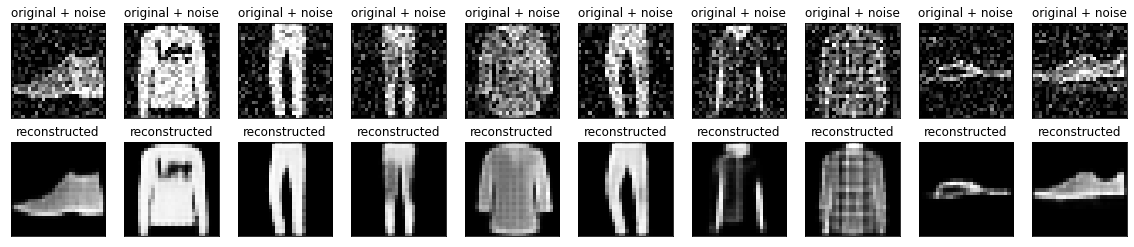

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

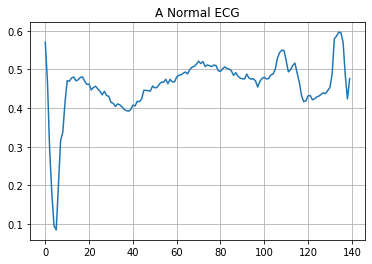

In [24]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

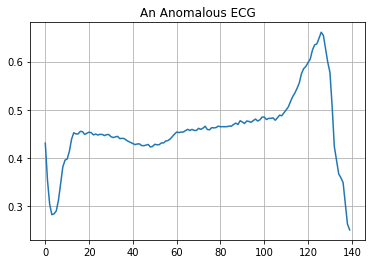

In [25]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [26]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [27]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [28]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


1/5 [=====>........................] - ETA: 1s - loss: 0.0641

5/5 [==============================] - 0s 25ms/step - loss: 0.0611 - val_loss: 0.0545


Epoch 2/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0575

5/5 [==============================] - 0s 6ms/step - loss: 0.0568 - val_loss: 0.0523


Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0554

5/5 [==============================] - 0s 6ms/step - loss: 0.0547 - val_loss: 0.0508


Epoch 4/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0534

5/5 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.0490


Epoch 5/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0505

5/5 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0472


Epoch 6/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0471

5/5 [==============================] - 0s 6ms/step - loss: 0.0460 - val_loss: 0.0461


Epoch 7/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0436

5/5 [==============================] - 0s 6ms/step - loss: 0.0428 - val_loss: 0.0451


Epoch 8/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0410

5/5 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0432


Epoch 9/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0374

5/5 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.0414


Epoch 10/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0341

5/5 [==============================] - 0s 6ms/step - loss: 0.0337 - val_loss: 0.0403


Epoch 11/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0328

5/5 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.0394


Epoch 12/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0301

5/5 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0385


Epoch 13/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0285

5/5 [==============================] - 0s 6ms/step - loss: 0.0282 - val_loss: 0.0378


Epoch 14/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0276

5/5 [==============================] - 0s 6ms/step - loss: 0.0270 - val_loss: 0.0372


Epoch 15/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0256

5/5 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.0366


Epoch 16/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0259

5/5 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.0361


Epoch 17/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0253

5/5 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0355


Epoch 18/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0245

5/5 [==============================] - 0s 6ms/step - loss: 0.0238 - val_loss: 0.0350


Epoch 19/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0239

5/5 [==============================] - 0s 6ms/step - loss: 0.0232 - val_loss: 0.0347


Epoch 20/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0234

5/5 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0342


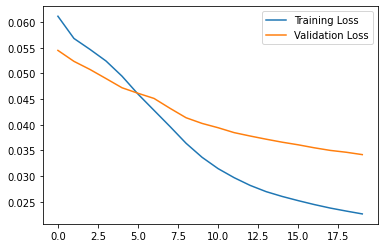

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

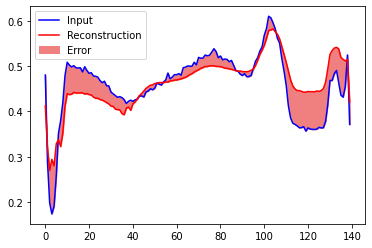

In [30]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

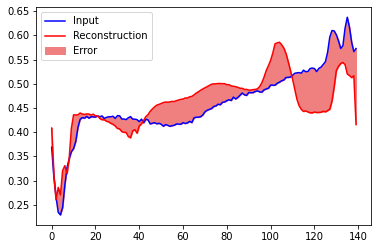

In [31]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

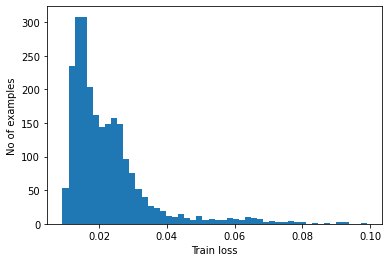

In [32]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [33]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.034232758


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

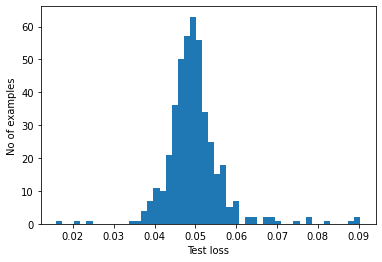

In [34]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [36]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429


## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
